## Data-visulization

This Notebook is made to understand the given data and analyze the given data, Therefore will help for train and planing various Data Preprocessing On it.

#### Dataset

Visulization will be done on the ```train.csv```     + There will be a display for the Image file given with it.

#### Data description
We have seen the details of the disease ```(Topic-info/Topic.MD)``` and what competition expects us to do, let's see the description of the data and what we need to do about it.

As we understand from the problem statement of the competition, our job is to make prognosis easier for the patients. We are provided with a baseline chest CT scan and associated clinical information for a set of patients. A patient has an image acquired at time Week = 0 and has numerous follow up visits over the course of approximately 1-2 years, at which time their FVC is measured.

Lung function is assessed based on output from a spirometer, which measures the forced vital capacity (FVC), i.e. the volume of air exhaled.

Train: We are provided with an anonymized, baseline CT scan and the entire history of FVC measurements.

Test: We are provided with a baseline CT scan and only the initial FVC measurement. You are asked to predict the final three FVC measurements for each patient, as well as a confidence value in your prediction.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import pydicom as dcm 
import glob

In [2]:
print("The File and there path :: ")
i =0
if(i < 25):
    for dirname, _, filenames in os.walk('B:\Projects\Kaggle OSIC\osic-pulmonary-fibrosis-progression/'):
        for filename in filenames:
            print(os.path.join(dirname, filename))
            i += 1

gle OSIC\osic-pulmonary-fibrosis-progression/train\ID00426637202313170790466\286.dcm
B:\Projects\Kaggle OSIC\osic-pulmonary-fibrosis-progression/train\ID00426637202313170790466\287.dcm
B:\Projects\Kaggle OSIC\osic-pulmonary-fibrosis-progression/train\ID00426637202313170790466\288.dcm
B:\Projects\Kaggle OSIC\osic-pulmonary-fibrosis-progression/train\ID00426637202313170790466\289.dcm
B:\Projects\Kaggle OSIC\osic-pulmonary-fibrosis-progression/train\ID00426637202313170790466\29.dcm
B:\Projects\Kaggle OSIC\osic-pulmonary-fibrosis-progression/train\ID00426637202313170790466\290.dcm
B:\Projects\Kaggle OSIC\osic-pulmonary-fibrosis-progression/train\ID00426637202313170790466\291.dcm
B:\Projects\Kaggle OSIC\osic-pulmonary-fibrosis-progression/train\ID00426637202313170790466\292.dcm
B:\Projects\Kaggle OSIC\osic-pulmonary-fibrosis-progression/train\ID00426637202313170790466\293.dcm
B:\Projects\Kaggle OSIC\osic-pulmonary-fibrosis-progression/train\ID00426637202313170790466\294.dcm
B:\Projects\Kagg

In [3]:
df = pd.read_csv("B:/Projects/Kaggle OSIC/osic-pulmonary-fibrosis-progression/train.csv")
df.head(10)

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker
5,ID00007637202177411956430,17,2101,52.868646,79,Male,Ex-smoker
6,ID00007637202177411956430,29,2000,50.327126,79,Male,Ex-smoker
7,ID00007637202177411956430,41,2064,51.937594,79,Male,Ex-smoker
8,ID00007637202177411956430,57,2057,51.761449,79,Male,Ex-smoker
9,ID00009637202177434476278,8,3660,85.282878,69,Male,Ex-smoker


##  ```df.keys & df.info```

* This helps us to know the column and total rows in it
* We have total no of rows is : 1548 

In [7]:
df.keys

<bound method NDFrame.keys of                         Patient  Weeks   FVC    Percent  Age   Sex  \
0     ID00007637202177411956430     -4  2315  58.253649   79  Male   
1     ID00007637202177411956430      5  2214  55.712129   79  Male   
2     ID00007637202177411956430      7  2061  51.862104   79  Male   
3     ID00007637202177411956430      9  2144  53.950679   79  Male   
4     ID00007637202177411956430     11  2069  52.063412   79  Male   
...                         ...    ...   ...        ...  ...   ...   
1544  ID00426637202313170790466     13  2712  66.594637   73  Male   
1545  ID00426637202313170790466     19  2978  73.126412   73  Male   
1546  ID00426637202313170790466     31  2908  71.407524   73  Male   
1547  ID00426637202313170790466     43  2975  73.052745   73  Male   
1548  ID00426637202313170790466     59  2774  68.117081   73  Male   

     SmokingStatus  
0        Ex-smoker  
1        Ex-smoker  
2        Ex-smoker  
3        Ex-smoker  
4        Ex-smoker  
...

In [9]:
df.info

<bound method DataFrame.info of                         Patient  Weeks   FVC    Percent  Age   Sex  \
0     ID00007637202177411956430     -4  2315  58.253649   79  Male   
1     ID00007637202177411956430      5  2214  55.712129   79  Male   
2     ID00007637202177411956430      7  2061  51.862104   79  Male   
3     ID00007637202177411956430      9  2144  53.950679   79  Male   
4     ID00007637202177411956430     11  2069  52.063412   79  Male   
...                         ...    ...   ...        ...  ...   ...   
1544  ID00426637202313170790466     13  2712  66.594637   73  Male   
1545  ID00426637202313170790466     19  2978  73.126412   73  Male   
1546  ID00426637202313170790466     31  2908  71.407524   73  Male   
1547  ID00426637202313170790466     43  2975  73.052745   73  Male   
1548  ID00426637202313170790466     59  2774  68.117081   73  Male   

     SmokingStatus  
0        Ex-smoker  
1        Ex-smoker  
2        Ex-smoker  
3        Ex-smoker  
4        Ex-smoker  
.

## ```df.describe()```

* This calculate all the mathematic parameters like 
    * Count
    * Mean
    * std
    * min
    * max
    * 25%
    * 75%
    * max
* Through This we get to know some of the essential info about patient
    * The mean FVC is : *2690.47*
    * The max age is : *88* & min age is *49*
    * The max weeks is : *133* & min weeks is *-5*
    Here -5 means (I have interpreted) that the disease start 5 weeks before the admission in the hospital 

In [11]:
df.describe()

,Weeks,FVC,Percent,Age
count,1549.000000,1549.000000,1549.000000,1549.000000
mean,31.861846,2690.479019,77.672654,67.188509
std,23.247550,832.770959,19.823261,7.057395
min,-5.000000,827.000000,28.877577,49.000000
25%,12.000000,2109.000000,62.832700,63.000000
50%,28.000000,2641.000000,75.676937,68.000000
75%,47.000000,3171.000000,88.621065,72.000000
max,133.000000,6399.000000,153.145378,88.000000


### ```df['Patient'].nunique()```  give us the told no Patient as in the dataset the Patient are repeated over the weeks 

In [15]:
df['Patient'].nunique()

176

In [40]:
FVC =df['FVC']
Age = df['Age']
Precentage =df['Percent']
Sex =df['Sex']
Weeks =df['Weeks']
df2=df[['Age','Weeks','FVC']]

### 👇🏻(Below) Graph is *counts of the ages*, This Graph present all the entires of data present in the dataset, this is not the counts of patients as total no of patients are *176*   

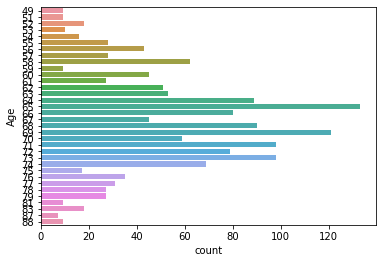

In [5]:
sb.countplot(y='Age',data=df)

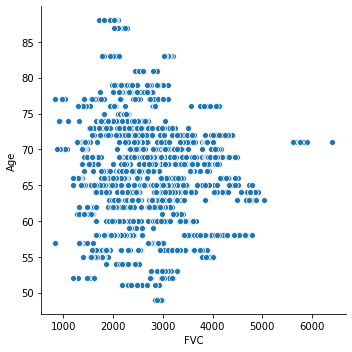

In [13]:
sb.relplot(y='Age', x='FVC', data=df )

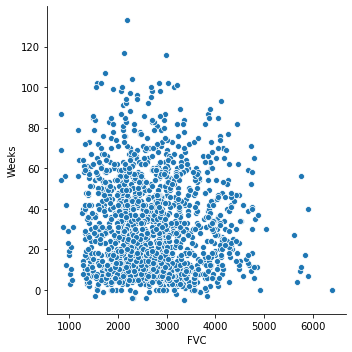

In [45]:
sb.relplot(y='Weeks', x='FVC', data=df )

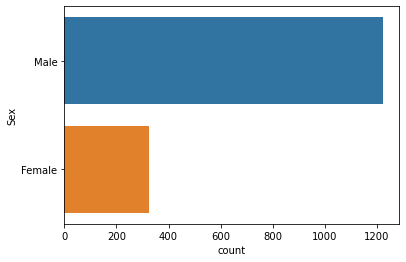

In [7]:
sb.countplot(y='Sex', data=df)

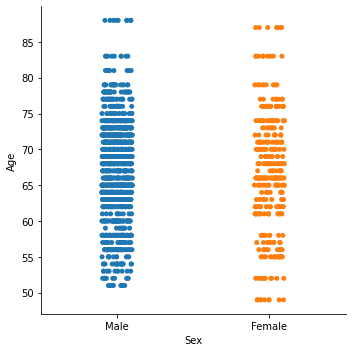

In [15]:
sb.catplot(y='Age', x='Sex', data=df)

##### Current Work

Working on the Heat Map and other type of graph to understande the data

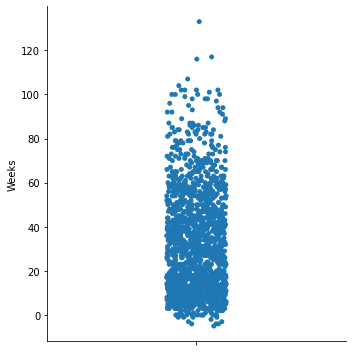

In [47]:
sb.catplot(y='Weeks', data=df)